In [15]:
from scipy.signal import butter, lfilter
import os, errno
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [16]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def get_diff(data):
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 100.0
    lowcut = 3.0
    highcut = 49.0

    filtered = butter_bandpass_filter(data, lowcut, highcut, fs, order=5)
    dF = np.diff(filtered.reshape(-1),n = 1)
    detect = dF >=0.1
    return(filtered, dF, detect)

In [17]:
# read all the data the infrared data

path = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\IR'
sensor_path = [(os.path.join(root, name), name) for root,_,file in os.walk(path)
                for name in file
                if name.endswith('.mat')]

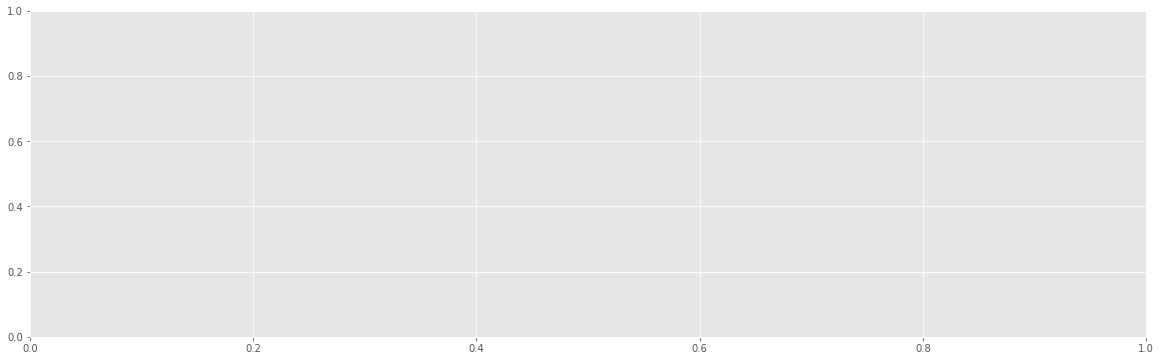

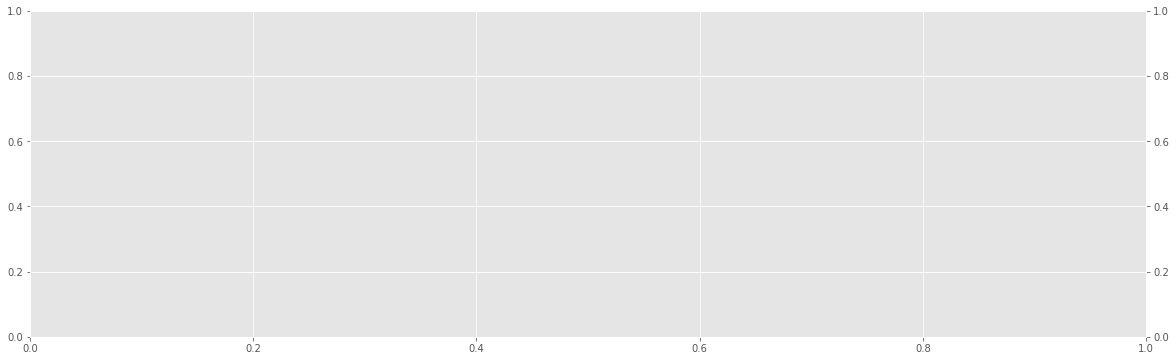

In [18]:
outpath = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Old\Old_Step4'
outpath_fig = r'C:\Users\Daniellab\Desktop\Light_level_videos_second_batch\Data\Old\Old_Step4\Figure'

try:
    os.makedirs(outpath_fig)
except OSError as e:
    if e.errno != errno.EEXIST:
        raise

fig1, ax0 = plt.subplots(figsize = (20,6))
fig2, axis0 = plt.subplots(figsize = (20,6))
axis1 = axis0.twinx()

In [13]:
sensor_path

[('C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\IR\\L0.1_c-3_m12.mat',
  'L0.1_c-3_m12.mat'),
 ('C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\IR\\L0.1_c-3_m2.mat',
  'L0.1_c-3_m2.mat'),
 ('C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\IR\\L0.1_c-3_m20.mat',
  'L0.1_c-3_m20.mat'),
 ('C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\IR\\L0.1_c-3_m21.mat',
  'L0.1_c-3_m21.mat'),
 ('C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\IR\\L0.1_c-3_m22.mat',
  'L0.1_c-3_m22.mat'),
 ('C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\IR\\L0.1_c-3_m23.mat',
  'L0.1_c-3_m23.mat'),
 ('C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\IR\\L0.1_c-3_m24.mat',
  'L0.1_c-3_m24.mat'),
 ('C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\IR\\L0.1_c-3_m25.mat',
  'L0.1_c-3_m25.mat'),
 ('C:\\Users\\Daniellab\\Desktop\\Light_level_videos_second_batch\\IR\\L0.1_c-3_m32.mat',
  'L0.1_

In [19]:
for moth in sensor_path:    
    sensor = io.loadmat(moth[0])
    sensor_fname = moth[1]
    IR = sensor['IR']
    print(moth[1])
    print(list(sensor.keys()))
    print(sensor['tDetect'])
    
    if moth[1].startswith('L0.1_c-3_m5'):
       
        cutframe = 191593 - 190573
        IR = IR[cutframe:]
        IR_2 = sensor['IR']
    elif moth[1].startswith('L0.1_c-3_m10'):
        cutframe = 142479 - 140658
        IR = IR[cutframe:]
        IR_2 = sensor['IR']
    

    filtered, diff, IRdetect = get_diff(IR)
    np.save(outpath + "\\" + sensor_fname + '_IRdetect', arr = IRdetect)

    # get variables for figure
    loadedIRdetect = np.load(outpath + "\\" + sensor_fname + '_IRdetect.npy')
    idx = np.where(loadedIRdetect)
    idx = idx[0].reshape(-1)

    #create filtered dataset and save the figure
    
    ax0.plot(IR, zorder = 1, label = 'raw IR')
    ax0.plot(filtered, 'b', zorder = 5, label = 'filtered IR')
    ax0.legend()
    fig1.savefig(outpath_fig + '\\' + sensor_fname + '_filteredIR.svg')
    ax0.cla()

    # create figure with marked events
    axis0.plot(filtered,c='blue', zorder = 5, label = 'High pass filtered')
    axis0.set_ylabel('IR filtered value (volts)', color ='blue')
    axis0.tick_params('y', color ='blue')

    axis1.plot(diff, c= 'darkred', zorder = 1, label = 'differential', alpha = 0.5)
    axis1.set_ylabel('differentiated trace', color ='darkred')
    axis1.tick_params('y', color ='darkred')

    axis1.plot(idx, diff[IRdetect], 'o', c = 'darkred')
    
    fig2.savefig(outpath_fig + '\\' + sensor_fname + '_diff_eventmarked.svg')
    axis0.cla()
    axis1.cla()

L0.1_c-3_m12.mat
['__header__', '__version__', '__globals__', 'IR', 'c', 'camera_time', 'inject', 'lux', 'tDetect']
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
L0.1_c-3_m2.mat
['__header__', '__version__', '__globals__', 'IR', 'c', 'camera_time', 'inject', 'lux', 'tDetect']
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
L0.1_c-3_m20.mat
['__header__', '__version__', '__globals__', 'IR', 'c', 'camera_time', 'inject', 'lux', 'tDetect']
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
L0.1_c-3_m21.mat
['__header__', '__version__', '__globals__', 'IR', 'c', 'camera_time', 'inject', 'lux', 'tDetect']
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
L0.1_c-3_m22.mat
['__header__', '__version__', '__globals__', 'IR', 'c', 'camera_time', 'inject', 'lux', 'tDetect']
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
L0.1_c-3_m23.mat
['__header__', '__version__', '__globals__', 'IR', 'c', 'camera_time', 'inject', 'lux', 'tDetect']
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
L0.1_c-3_m24.mat
['__header__', '__version__', '__globals__', 'IR', 'c', 'camera_time', '

In [36]:
cutframe = 10
IR = sensor['IR']
IR_cut = sensor['IR'][cutframe:]

In [49]:
print(len(IR), len(IR_2))

116139 117960


In [37]:
print(len(IR), len(IR_cut))

147828 147818
